In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, LSTM, Bidirectional
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from sklearn.metrics import precision_score, recall_score, f1_score, cohen_kappa_score, classification_report
from sklearn.model_selection import train_test_split

In [2]:
# import requests

# url = 'https://drive.google.com/drive/folders/1EBKB7KR7cryLxCCIFB2vaTCioDwc5wH6?usp=sharing'

# response = requests.get(url)

In [5]:
data = pd.read_csv('data/preprocessed.csv').dropna()
data = data.loc[(data["'American'"]==1)|(data[" 'American'"]==1)]

FileNotFoundError: [Errno 2] File data/preprocessed.csv does not exist: 'data/preprocessed.csv'

In [82]:
X = data["Reviews_cleaned"]
y = data["Category"]

In [83]:
maxlen = 10
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
word_index = tokenizer.word_index
print(f"Znaleziono {len(word_index)} unikatowych tokenów.")
data_X = pad_sequences(sequences, maxlen=maxlen)
print(f"Kształt tensora danych: {data.shape}") 
print(f"Kształt tensora etykiet: {y.shape}")

Znaleziono 1309 unikatowych tokenów.
Kształt tensora danych: (1826, 245)
Kształt tensora etykiet: (1826,)


In [84]:
X_train, X_test, y_train, y_test = train_test_split(data_X, y, test_size=0.2, random_state=42, stratify=y)

In [85]:
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [86]:
X_train.shape, X_test.shape, X.shape

((1460, 10), (366, 10), (1826,))

In [87]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(Bidirectional(LSTM(32, recurrent_dropout=0.2)))
model.add(Dense(8))
model.add(Dense(1, activation='sigmoid'))

In [88]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [89]:
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/5
10/10 [==============================] - 6s 83ms/step - loss: 0.6905 - accuracy: 0.5334 - val_loss: 0.6764 - val_accuracy: 0.5822
Epoch 2/5
10/10 [==============================] - 0s 29ms/step - loss: 0.6774 - accuracy: 0.5856 - val_loss: 0.6557 - val_accuracy: 0.5822
Epoch 3/5
10/10 [==============================] - 0s 29ms/step - loss: 0.6431 - accuracy: 0.6738 - val_loss: 0.6213 - val_accuracy: 0.7534
Epoch 4/5
10/10 [==============================] - 0s 31ms/step - loss: 0.5335 - accuracy: 0.8245 - val_loss: 0.5232 - val_accuracy: 0.7363
Epoch 5/5
10/10 [==============================] - 0s 29ms/step - loss: 0.3933 - accuracy: 0.8519 - val_loss: 0.5133 - val_accuracy: 0.7705


In [90]:
import matplotlib.pyplot as plt
def plot_history(history, key="loss"):
    metric = history.history[key]
    val_metric = history.history[f"val_{key}"]
    epochs = range(len(metric))
    plt.plot(epochs, metric, "bo", label=f"{key} - train")
    plt.plot(epochs, val_metric, "b", label=f"{key} - val")
    plt.title(f"training - {key}")
    plt.legend()
    plt.show()

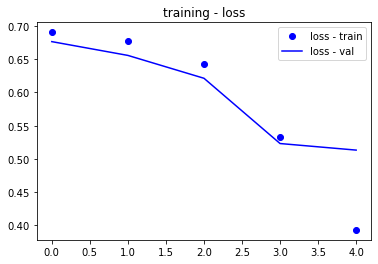

In [91]:
plot_history(history)

In [92]:
y_pred = np.round(model.predict(X_test))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.61      0.67       170
         1.0       0.71      0.82      0.76       196

    accuracy                           0.72       366
   macro avg       0.73      0.71      0.71       366
weighted avg       0.72      0.72      0.72       366



In [93]:
cohen_kappa_score(y_test, y_pred)

0.43316125113877924

In [94]:
f1_score(y_test, y_pred)

0.7582938388625592